# Linear regression and beyond

We will take a closer look at the main concepts of TensorFlow and TensorBoard and try to do some basic operations to get you started. The model we want to implement simulates linear regression.

In statistics and ML, linear regression is a technique that's frequently used to measure the relationship between variables. This is a quite simple but effective algorithm that can be used in predictive modeling as well.

Linear regression models the relationship between a dependent variable, ***Yi***, an interdependent variable, ***Xi***, and a random term, ***b***. This can be seen as follows:

***y = W * x + b***

A typical linear regression problem using TensorFlow has the following workflow, which updates the parameters to minimize the given cost (see in the following figure) function:

![](../../imgs/tf_workflow.jpg)

Now, let's try to follow the preceding figure and reproduce it for the linear regression by conceptualizing the preceding equation. For this, we're going to write a simple Python program for creating data in a 2D space. Then we will use TensorFlow to look for the line that best fits the data points (as shown in the following figure):

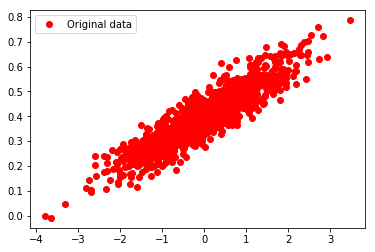

In [1]:
# Import the libraries (Numpy, matplotlib)
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Create 1000 points following a function y=0.1 * x + 0.4z
# (i.e. # y = W * x + b) with some normal random distribution:

num_points = 1000
vectors_set = []

# Create a few random data points
for i in range(num_points):
    W = 0.1
    b = 0.4
    x1 = np.random.normal(0.0, 1.0) # in: mean, standard deviation
    nd = np.random.normal(0.0, 0.05) # in: mean, standard deviation
    y1 = W * x1 + b

    # Add some impurity with normal distribution -i.e. nd 
    y1 = y1 + nd
    
    # Append them and create a combined vector set:
    vectors_set.append([x1, y1])
    
# Separate the data point across axises:
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

# Plot and show the data points in a 2D space
plt.plot(x_data, y_data, 'ro', label='Original data')
plt.legend()
plt.show()

Well, so far we have just created a few data points without an associated model that could be executed through TensorFlow. So, the next step is to create a linear regression model that can obtain the output values ***y*** that is estimated from the input data points, that is, *x_data*. In this context, we have only two associated parameters, **W** or __b__.

Now the objective is to create a graph that allows us to find the values for these two parameters based on the input data, *x_data*, by adjusting them to *y_data*. So, the target function in our case would be as follows:

*__y_data = W * x_data + b__*

We defined **W=0.1** and __b=0.4__ while creating the data points in the 2D space. TensorFlow has to optimize these two values so that **W** tends to __0.1__, and **b** to __0.4__.

A standard way to solve such optimization problems is to iterate through each value of the data points and adjust the values of **W** and __b__ in order to get a more precise answer for each iteration. To see if the values really are improving, we need to define a cost function that measures how good a certain line is.

In our case, the cost function is the mean squared error, which helps us find the average of the errors based on the distance function between the real data points and the estimated ones on each iteration. We start by importing the TensorFlow library:

In [2]:
import tensorflow as tf

W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

Instructions for updating:
Colocations handled automatically by placer.


In the preceding code segment, we are generating a random point using a different strategy and storing it in the variable **W**. Now, let's define a loss function, *__loss = mean[(y - y_data)2]__*, and this returns a scalar value with the mean of all distances between our data and the model prediction. In terms of TensorFlow convention, the loss function can be expressed as follows: 

In [3]:
loss = tf.reduce_mean(tf.square(y - y_data))

The preceding line actually computes **mean square error (MSE)**. Without going into further detail, we can use some widely used optimization algorithms, such as GD. At a minimal level, GD is an algorithm that works on a set of given parameters that we already have.

It starts with an initial set of parameter values and iteratively moves toward a set of values that minimize the function by taking another parameter called the learning rate. This iterative minimization is achieved by taking steps in the negative direction of the gradient function:

In [4]:
optimizer = tf.train.GradientDescentOptimizer(0.6)
train = optimizer.minimize(loss)

Before running this optimization function, we need to initialize all the variables that we have so far. Let's do it using a conventional TensorFlow technique, as follows:

In [5]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Since we have created a TensorFlow session, we are ready for the iterative process that helps us find the optimal values of *W* and _b_:

In [6]:
for i in range(6):
    sess.run(train)
    print(i, sess.run(W), sess.run(b), sess.run(loss))

0 [0.14076623] [0.48133674] 0.0107593555
1 [0.08696795] [0.38388062] 0.0029416017
2 [0.10679819] [0.40382615] 0.0024700311
3 [0.09962361] [0.3996696] 0.0024311931
4 [0.10219353] [0.40056148] 0.0024271354
5 [0.10127803] [0.40036142] 0.0024266597


0 [0.10160317] [0.40040916] 0.0024266015


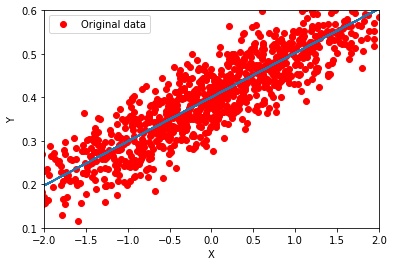

1 [0.1014879] [0.40039685] 0.0024265943


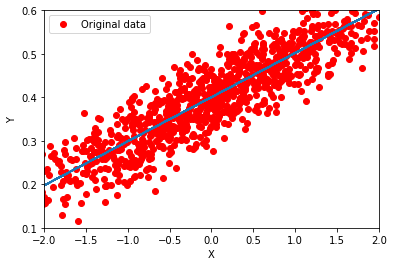

2 [0.10152873] [0.40040028] 0.0024265933


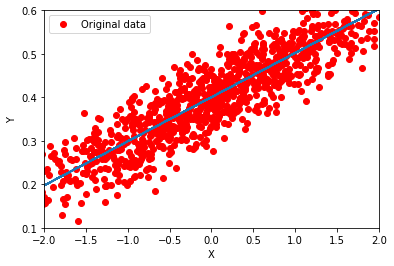

3 [0.10151427] [0.40039927] 0.0024265933


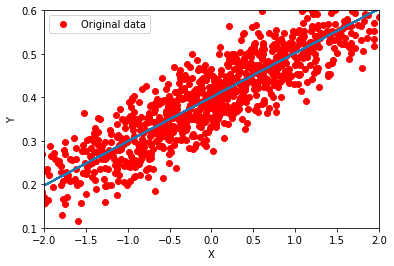

4 [0.10151938] [0.4003996] 0.0024265936


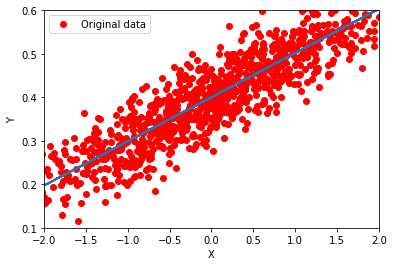

5 [0.10151758] [0.40039948] 0.0024265933


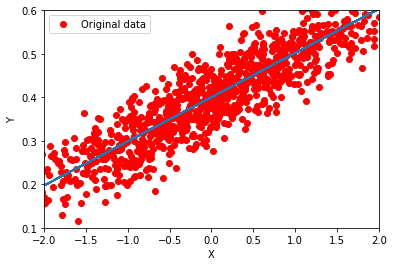

In [7]:
for i in range(6):
   sess.run(train)
   print(i, sess.run(W), sess.run(b), sess.run(loss))
   plt.plot(x_data, y_data, 'ro', label='Original data')
   plt.plot(x_data, sess.run(W)*x_data + sess.run(b))
   plt.xlabel('X')
   plt.xlim(-2, 2)
   plt.ylim(0.1, 0.6)
   plt.ylabel('Y')
   plt.legend()
   plt.show()

Now, what if we improve our visual analytics further through TensorFlow to help visualize what is happening in these graphs. TensorBoard provides a web page for debugging your graph and inspecting the variables, node, edges, and their corresponding connections.

Also, we need to annotate the preceding graphs with the variables, such as the loss function, W, b, y_data, x_data, and so on. Then you need to generate all the summaries by invoking the tf.summary.merge_all() function.

Now, we need to make the following changes to the preceding code. However, it is good practice to group related nodes on the graph using the tf.name_scope() function. Thus, we can use tf.name_scope() to organize things on the TensorBoard graph view, but let's give it a better name:

In [12]:
with tf.name_scope("LinearRegression") as scope:
   W = tf.Variable(tf.zeros([1]), name='W')
   b = tf.Variable(tf.zeros([1]), name='b')
   y = W * x_data + b

with tf.name_scope("LossFunction") as scope:
  loss = tf.reduce_mean(tf.square(y - y_data))

# Let's annotate the loss, weights, and bias that are needed for TensorBoard
loss_summary = tf.summary.scalar("loss", loss)
w_ = tf.summary.histogram("W", W)
b_ = tf.summary.histogram("b", b)

# Once you have annotated the graph, it's time to configure the summary by merging them
merged_op = tf.summary.merge_all()

# Before running the training (after the initialization), write the summary using the 
# tf.summary.FileWriter() API as follows
writer_tensorboard = tf.summary.FileWriter('../../logs/LR/', tf.get_default_graph())

In [ ]:
# $ tensorboard –-logdir='logs/LR/'